Created: 15.07.2022 <br>
Author: Melih Kara kara@kit.edu

# Supernova Analysis within XENONnT

This notebook retraces the steps of the [Lang et al. paper](https://arxiv.org/pdf/1606.09243.pdf) <br>
We start with a supernova model with 27M$_\odot$ and LS220 Equation of state as described in the aforementioned paper.

**At the end we want to calculate the scattering rate** <br>
$$\frac{d^2 R}{dE_R dt_{pb}} = \sum_{\nu_\beta} N_{Xe} \int_{E_{min}^\nu} dE_\nu ~f_\nu (E_\nu,t,d) ~\frac{d\sigma}{dE_R}(E_\nu, E_r)$$

## Neutrino Flux
$$f_{\nu_\beta} (E_\nu, t_{pb}) = \frac{L_{\nu_\beta}(t_{pb})}{4\pi d^2} \frac{\Phi_{\nu_\beta}(E_\nu,t_{pb})}{\langle E_{\nu_\beta} (t_{pb}) \rangle}$$

The supernova simulation models provide us with the luminosity and energy densities. We can construct the neutrino flux using these information <br>

Here $\Phi_{\nu_\beta}(E,t_{pb})$ is the **neutrino energy distribution** given at different energies and at different times for each flavor $\nu_\beta$.

Therefore for a given distance we can compute the neutrino flux for any energy at any time. See below


**Neutrino energy distribution** is given in [\[1\]](https://arxiv.org/pdf/astro-ph/0208035.pdf)[\[2\]](https://arxiv.org/pdf/1211.3920.pdf) as <br><br>
<br>
$$\Phi_{\nu_\beta}(E,t_{pb})=\text{A}(t_{pb})~\left(\frac{E}{\langle E_{\nu_\beta}(t_{pb})\rangle} \right)^{\alpha_\beta(t_{pb})}\times \exp\left[-\frac{(\alpha_\beta+1)E}{\langle E_{\nu_\beta} (t_{pb}) \rangle} \right] $$ <br> 
Where the normalization $A$ satisfies $$\int dE \phi_{\nu_\beta(E,t_{pb})}=1$$ <br>


<!-- \rightarrow \xi_\beta (t_{pb}) -->

The fit param $\alpha_\beta$ satisfies the relation <br>
$$\frac{\langle E_{\nu_\beta}(t_{pb})^2 \rangle}{\langle E_{\nu_\beta}(t_{pb})\rangle^2} = \frac{2+\alpha_\beta(t_{pb})}{1+\alpha_\beta(t_{pb})}$$ which for $\alpha_\beta$ becomes $$\alpha_\beta = \frac{2\overline{E}^2 - \overline{E^2}}{\overline{E^2}-\overline{E}^2}$$

- As one can see, computing the flux is not straightforward even when you have the luminosity

## Cross-Section

$$\frac{d \sigma}{d E_{\mathrm{R}}}=\frac{G_{F}^{2} m_{\mathrm{N}}}{4 \pi} Q_{W}^{2}\left(1-\frac{m_{\mathrm{N}} E_{\mathrm{R}}}{2 E_{\nu}^{2}}\right) F^{2}\left(E_{\mathrm{R}}\right) $$ <br>
$$Q_W = N - (1 - 4\sin^2\theta_W)Z$$ <br>
$$\sin^2\theta_W = 0.2386$$

The next important piece of information is the coherent neutrino - nucleus cross-section. Neglecting the neutrino masses as $m_\nu \ll m_n$ the coherent scattering cross-section is given as [Drukier & Stodolsky](https://journals.aps.org/prd/pdf/10.1103/PhysRevD.30.2295). Where; <br>
$G_F$ is the Fermi constant <br>
$Q_W$ is the weak nuclear hypercharge with nucleons <br>
$F(E_R)$ is the nuclear form factor.

$$F(E_R) = \frac{3j_1(qr_n)}{qr_n}\exp\left( -\frac{(qs)^2}{2} \right)$$

$$q^2 = 2m_N E_R $$<br>
$$s = 0.9 ~\text{fm} \qquad r_n^2 = c^2 + 7/3~\pi^2a^2 - 5s^2$$ <br>
$$a=0.52 ~\text{fm}$$ <br>
$$c=1.23 A^{1/3}-0.6 ~\text{fm}$$

---

### Compute Neutrino-Nucleus Cross Sections

In [1]:
from astropy import units as u
import numpy as np

hbar = 1.0546e-27*u.cm**2 *u.g / u.s
c_speed = 2.99792458e10*u.cm/u.s # 299792458*u.m/u.s
m_e = 9.109e-31*u.kg

# fixed params for Xe131
Z_Xe = 54
Neu_Xe = 77
A_Xe = Z_Xe + Neu_Xe
amu = 1.66053904e-27*u.kg
m_N = 131.293*amu # 131 * 938.3 # A x rest mass of a proton in MeV

# rest mass of a proton
# p_m = (m_N*c_speed**2).to(u.MeV) / 131.293 # 938.27208816(29) MeV/c2

# mass of the Xenon nucleus in keV
m_Nval = (m_N*(c_speed**2)).to(u.keV)

# these have the units of length
par_a = 0.52*u.fm 
par_c = (1.23*A_Xe**(1./3) - 0.6)*u.fm
par_s = 0.9*u.fm
rn = np.sqrt(par_c**2 + 7./3 * (np.pi*par_a)**2 - 5*par_s**2)

# everything in energy units
aval = (par_a/hbar/c_speed).to(u.keV**-1) #.value # a in keV
cval = (par_c/hbar/c_speed).to(u.keV**-1) #.value # c in keV
sval = (par_s/hbar/c_speed).to(u.keV**-1) #.value # s value in keV
rnval = (rn/hbar/c_speed).to(u.keV**-1) #.value # rn value in keV

Form factor is unitless, and the second term is a ratio therefore it is also unitless. Since the cross-section should give us area per energy, the first part should have units compatible to $m^2/keV$  
$$\frac{d \sigma}{d E_{\mathrm{R}}}=\frac{G_{F}^{2} m_{\mathrm{N}}}{4 \pi} Q_{W}^{2}\left(1-\frac{m_{\mathrm{N}} E_{\mathrm{R}}}{2 E_{\nu}^{2}}\right) F^{2}\left(E_{\mathrm{R}}\right) $$

In [2]:
(1*u.u).decompose()

<Quantity 1.66053907e-27 kg>

In [3]:
sin2theta = 0.2386
Q_W = Neu_Xe - (1-4*sin2theta) * Z_Xe

Notice formulae are given in _Natural Units_ therefore we need a conversion. This can be done using the following conversions <br>
Natural unit conversions <br>
    $\rightarrow$ $[L]:=\hbar / m_e c$ , <br>
    $\rightarrow$ $[M]:=m_e$ ,<br>
    $\rightarrow$ $[T]:=\hbar/m_e c^2$

In [4]:
# natural units 
len_nat = (hbar/(m_e*c_speed)).decompose()
e_nat = (m_e * c_speed**2).to(u.keV)
t_nat = (len_nat / c_speed).to(u.s)

In [5]:
GF = 8.958e-44 * u.MeV * u.cm**3
GFnat = (GF/(hbar*c_speed)**3).to(u.keV**-2)

print(f'The G_F have the natural units of : {GFnat.unit}, thus G_F2*m_N have : {(GFnat**2 * m_Nval).unit}')
print(f'I need differential cross-section to have units of m2 / keV')
print(f'Thus multiplying with a correction factor having units of m2*keV2 would give this ')
corrGFmN = len_nat**2 * e_nat**2
print(f'The unit of the GF^2*m_N after correction becomes : {((GFnat**2*m_Nval)*corrGFmN).unit}')

The G_F have the natural units of : 1 / keV2, thus G_F2*m_N have : 1 / keV3
I need differential cross-section to have units of m2 / keV
Thus multiplying with a correction factor having units of m2*keV2 would give this 
The unit of the GF^2*m_N after correction becomes : m2 / keV


In [6]:
term1 = corrGFmN * (GFnat**2) * m_Nval * (Q_W**2) / (4*np.pi)
term1

<Quantity 2.86149131e-43 m2 / keV>

### Helm's Form Factor
$$F(E_R) = \frac{3j_1(qr_n)}{qr_n}\exp\left( -\frac{(qs)^2}{2} \right)$$

In [7]:
# m_Nval_MeV = m_Nval.to(u.MeV)

In [8]:
from scipy.special import spherical_jn
import matplotlib
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['xtick.major.pad'] = 5
plt.rcParams['ytick.major.pad'] = 5

plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.minor.pad'] = 5
plt.rcParams['ytick.minor.pad'] = 5
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['font.size'] = 16

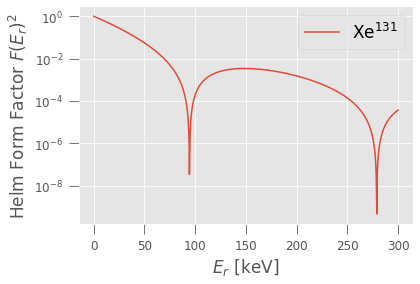

In [9]:
def form_factor(Er):
    """
    Helms Form Factor
    Arguments
    ---------
    Er : Recoil energy (need units)
    Returns 
    -------
    F(E_R) = 3*j_1(q*r_n) / (q*r_n) * exp(-(q*s)^2/2)
    
    """
    Er = Er.to(u.keV) # keV
    q = np.sqrt(2*m_Nval*Er) # keV
    # avoid zero division
    q = np.array([q]) if np.ndim(q)==0 else q
    q[q==0] = np.finfo(float).eps * q.unit
    qrn = q*rnval
    
    # spherical_jn doesn't accept units, feed values
    j1 = spherical_jn(1, qrn.value)     # unitless
    t1 = 3*j1*qrn.unit / qrn
    t2 = np.exp(-0.5 * (q*sval)**2)
    return t1*t2

Er_tests = np.linspace(0,300,1000)*u.keV
ffacts = form_factor(Er_tests)**2

plt.semilogy(Er_tests, ffacts, label=r'Xe$^{131}$'); plt.legend(fontsize=17)
plt.ylabel(f'Helm Form Factor $F(E_r)^2$',fontsize=17); plt.xlabel(r'$E_r$ [keV]',fontsize=17);

Now we can compute the cross section
$$\frac{d \sigma}{d E_{\mathrm{R}}}=\text{term1}\times f(E_R, E_\nu)$$ <br>
where $f(E_R, E_\nu)=\left(1-\frac{m_{\mathrm{N}} E_{\mathrm{R}}}{2 E_{\nu}^{2}}\right) F^{2}\left(E_{\mathrm{R}}\right) $

In [10]:
def nN_cross_section(Enu, Er):
    """     neutrino nucleus Cross-Section
    Arguments
    ---------
    Enu : array, Neutrino energies, (needs unit)
    Er : array, Recoil energies, (needs unit)
    Returns
    -------
    dsigma / dE_r:
        neutrino-nucleus cross section in units of m^2 / MeV
    
    Notes:
        GFnat.value : has a unit of keV^-2
        mNval       : has a unit of keV
        corrGFmNval : has a unit of m^2 keV^2 
    """
    # Avoid division by zero in energy PDF below.
    Enu[Enu==0] = np.finfo(float).eps * Enu.unit
    Er[Er==0] = np.finfo(float).eps * Er.unit
    
    ffactor = form_factor(Er)**2 * term1
    xsec = np.zeros(shape=(len(Enu), len(Er)))
    xsec = ffactor[:, np.newaxis] * (1-0.5*m_Nval*np.outer(Er, Enu**-2.))
    xsec[xsec<0] = 0

    return xsec

$$d\sigma / dE_R (E_R, E_\nu)$$

In [11]:
# Further visualise the cross section for different neutrino energies with different recoil energies
Enu_vals = np.linspace(0,100,100)*u.MeV
Er_vals = np.linspace(0,15,150)*u.keV
cs_test = nN_cross_section(Enu_vals, Er_vals)
cs_test.shape

(150, 100)

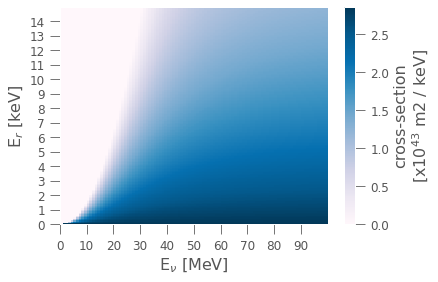

In [12]:
cb = plt.pcolormesh(cs_test*1e43, cmap='PuBu') #,norm=matplotlib.colors.LogNorm())
plt.xlabel(r'E$_\nu$ [MeV]', fontsize=16); plt.ylabel(r'E$_r$ [keV]', fontsize=16);
cbb = plt.colorbar(cb)
cbb.set_label('cross-section\n' 
              fr'[x$10^{{43}}$ {cs_test.unit}]', fontsize=16);
plt.xticks(ticks=np.arange(0,100,10));
plt.yticks(ticks=np.arange(0,150,10), labels=np.arange(0,15,1));

In [13]:
Er_vals

<Quantity [2.22044605e-16, 1.00671141e-01, 2.01342282e-01, 3.02013423e-01,
           4.02684564e-01, 5.03355705e-01, 6.04026846e-01, 7.04697987e-01,
           8.05369128e-01, 9.06040268e-01, 1.00671141e+00, 1.10738255e+00,
           1.20805369e+00, 1.30872483e+00, 1.40939597e+00, 1.51006711e+00,
           1.61073826e+00, 1.71140940e+00, 1.81208054e+00, 1.91275168e+00,
           2.01342282e+00, 2.11409396e+00, 2.21476510e+00, 2.31543624e+00,
           2.41610738e+00, 2.51677852e+00, 2.61744966e+00, 2.71812081e+00,
           2.81879195e+00, 2.91946309e+00, 3.02013423e+00, 3.12080537e+00,
           3.22147651e+00, 3.32214765e+00, 3.42281879e+00, 3.52348993e+00,
           3.62416107e+00, 3.72483221e+00, 3.82550336e+00, 3.92617450e+00,
           4.02684564e+00, 4.12751678e+00, 4.22818792e+00, 4.32885906e+00,
           4.42953020e+00, 4.53020134e+00, 4.63087248e+00, 4.73154362e+00,
           4.83221477e+00, 4.93288591e+00, 5.03355705e+00, 5.13422819e+00,
           5.23489933e+00

In [14]:
sigmas = nN_cross_section([30]*u.MeV, Er_vals)

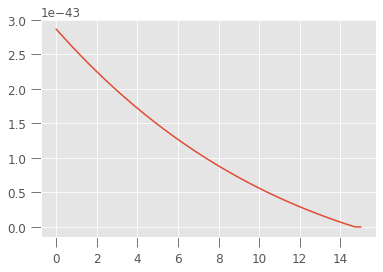

In [15]:
plt.plot(Er_vals, sigmas)

It is clear that the cross section is larger for larger neutrino energies, and larger for low recoils.

---

## Fluxes
The fluxes are model dependent. Therefore we start with a model from `snewpy`

## Models

There are several different supernova models. Ultimately, we want to test all of them. Luckily `snewpy` is a provides a collection of various models. Notice that due to their construction each model will require an initial formatting.

In [16]:
import snewpy
from snewpy.models.ccsn import Bollig_2016
from snewpy.neutrino import Flavor
import os
from tqdm.notebook import tqdm

In [17]:
models_folder = "/mnt/c/Users/bj7780/Desktop/Kara/GitHub/SNEWS/snewpy/models"
ifile = os.path.join(models_folder, 'Bollig_2016/s11.2c')
model = Bollig_2016(ifile, 'LS220')

In [18]:
from snewpy.models.ccsn import Nakazato_2013
ifile2 = os.path.join(models_folder, 'Nakazato_2013/nakazato-shen-z0.004-t_rev200ms-s13.0.fits')
model2 = Nakazato_2013(ifile2)

The model gives the 
- *times* `model.times`, [s]
- *luminosities* `model.luminosity` [$erg^{-1} s^{-1}$]
- *mean $\nu$ energies* `model.meanE` [MeV]
- *alpha parameter* `model.pinch` [unitless]
and provides a function to compute fluxes $f_\nu$ for each flavor at any given time and energy.

In [19]:
times = model.time
lum = model.luminosity
alpha = model.pinch
meanE = model.meanE

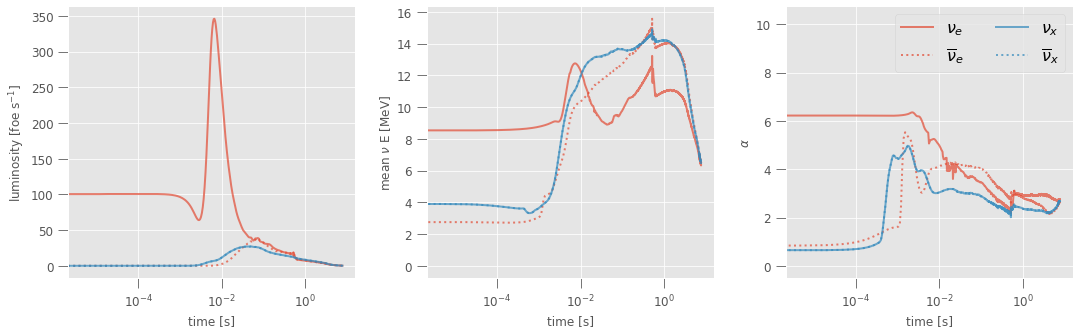

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,5))
plt.subplots_adjust(wspace=0.25, hspace=0.3)

for flavor in Flavor:
    kwargs = dict(label=flavor.to_tex(), color='C0' if flavor.is_electron else 'C1',
                  ls='-' if flavor.is_neutrino else ':', lw=2, alpha=0.7)
    ax1.plot(model.time, lum[flavor]/1e51, **kwargs)
    ax2.plot(model.time, meanE[flavor], **kwargs)
    ax3.plot(model.time, alpha[flavor], **kwargs)

for a in [ax1,ax2,ax3]:
    a.set_xscale('log')
    
ax3.legend(loc='upper right', ncol=2, fontsize=16)
ax1.set(ylabel='luminosity [foe s$^{-1}$]', xlabel='time [s]')
ax2.set(ylabel=r'mean $\nu$ E [MeV]', xlabel='time [s]')
ax3.set(ylabel=r'$\alpha$', xlabel='time [s]');

Here the luminosity is the luminosity over all the energies. <br>

The `model.get_initial_spectra(t, E)` can fetch the spectra at any time and at any energy. It returns the fluxes in units of $1/(erg ~s)$<br>
_Note: foe stands for fifty-one-ergs_

In [21]:
# model.get_initial_spectra??

In [22]:
print("At 50ms, the number of neutrinos with energies 10 MeV\n")
init_spec = model.get_initial_spectra(50*u.ms, 10*u.MeV)
for f in Flavor:
    print(f.to_tex(), init_spec[f])

At 50ms, the number of neutrinos with energies 10 MeV

$\nu_e$ 1.41280348210941e+62 1 / (erg s)
$\overline{\nu}_e$ 8.884160848506432e+61 1 / (erg s)
$\nu_x$ 5.249226996121538e+61 1 / (erg s)
$\overline{\nu}_x$ 5.249226996121538e+61 1 / (erg s)


We can get the fluxes as a function of time (`ispec_t`) or as a function of neutrino energies (`ispec_E`). <br>
The `self.get_initial_spectra()` function doesn't allow vectorization over time indicies. So we compute the fluxes over all energies easily, but for time, we make a tweak.

In [23]:
# define some neutrino energies
Enu_vals = np.linspace(0,150,100)*u.MeV
ispec_t = model.get_initial_spectra(50*u.ms, Enu_vals) # init spect, oscillated possible
fluxunit = ispec_t[Flavor.NU_E].unit

# for different times, it does not work, so we tweak
# notice, the times are way too much, so we sparse it
_times = times #[::10]
# construct a dictionary containing each {flavorname-array} pairs for each flavor
ispec_E = {f:np.zeros(len(_times))*fluxunit for f in Flavor}
for i, t in tqdm(enumerate(_times), total=len(_times)):
    temp = model.get_initial_spectra(t, 10*u.MeV)
    for f in Flavor:
        ispec_E[f][i] = temp[f]

  0%|          | 0/12380 [00:00<?, ?it/s]

Let's have look at the fluxes at 50ms for all neutrino energies, and at all times for neutrinos with energies 10 MeV. <br>
Notice that since the luminosity and flux has a linear relation, the over-time plots for a single energy and the luminosity plots look similar.

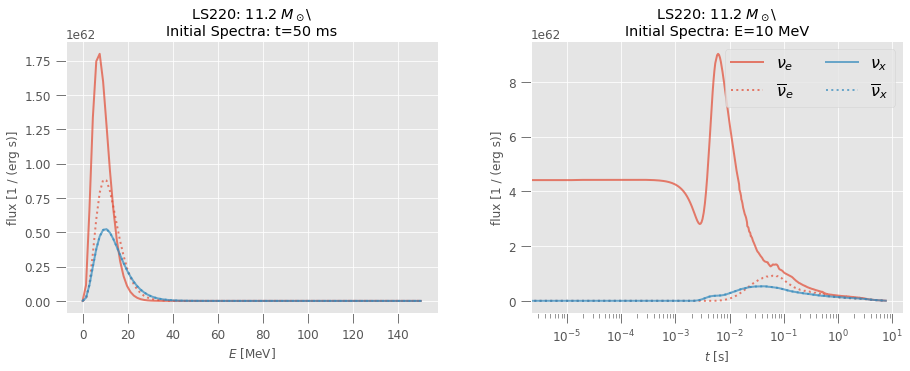

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
plt.subplots_adjust(wspace=0.25, hspace=0.3)
for f in Flavor:
    kwargs = dict(label=f.to_tex(), color='C0' if f.is_electron else 'C1',
            ls='-' if f.is_neutrino else ':', lw=2, alpha=0.7)
    ax1.plot(Enu_vals, ispec_t[f], **kwargs)
    ax2.plot(_times, ispec_E[f], **kwargs)

ax1.set(xlabel=fr'$E$ [{Enu_vals.unit}]', title=fr'{model.EOS}: {model.progenitor_mass.value} $M_\odot$\
Initial Spectra: t=50 ms', ylabel=fr'flux [{ispec_t[Flavor.NU_E].unit}]')
ax2.set(xlabel=fr'$t$ [{_times.unit}]', title=fr'{model.EOS}: {model.progenitor_mass.value} $M_\odot$\
Initial Spectra: E=10 MeV', ylabel=fr'flux [{ispec_E[Flavor.NU_E].unit}]') #  , xlim=(-0.05, 5)

ax1.grid(True); ax2.grid(True)
ax2.set_xscale('log')
ax2.legend(loc='upper right', ncol=2, fontsize=16);

### Compute Scattering Rates

Now we can calculate the term 
$$ \frac{d^2 R}{dE_R dt_{pb}} = \sum N_{Xe} \underbrace{\int_{E_{min}^\nu} dE_\nu \underbrace{~f_\nu (E_\nu,t) ~\frac{d\sigma}{dE_R}(E_\nu, E_r)}_{part1}}_{part2}$$

Remember that flux is defined as <br>
$$f_{\nu_\beta} (E_\nu, t_{pb}) = \frac{1}{4\pi d^2}L_{\nu_\beta}(t_{pb}) \frac{\Phi_{\nu_\beta}(E_\nu,t_{pb})}{\langle E_{\nu_\beta} (t_{pb}) \rangle}$$
Where the last term is the neutrino energy distribution function. For the given model, the `model.get_initial_spectra()` function takes that into account. However, the function returns the fluxes at the source, meaning that it neglects the first term which scales for the distance.

In [25]:
# model.get_initial_spectra??

In [26]:
from scipy.special import loggamma

# this function takes the spectra and scales for distance
def nu_flux(model, t, Enu_arr, distance=10*u.kpc, flavors=Flavor):
    """ Neutrino flux for a given neutrino energy at a given time
        t         : time (need units)
        Enu_arr   : neutrino energies (need units)
        dist      : the distance to the SN (need units)

    Returns
    dictionary containing each flavor
        fluxes at each energies at a given time in units of [1/MeV/m/s]
    """
    initial_spectra = model.get_initial_spectra(t, Enu_arr, flavors=flavors)
    # initial_spectra has the fluxes at the source, we scale by distance
    for f in flavors:
        initial_spectra[f] /= (distance**2).to(u.m**2) * 4*np.pi
    return initial_spectra

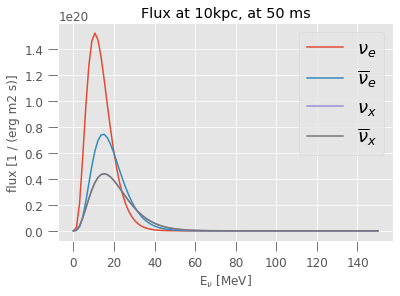

In [27]:
a = nu_flux(model, 50 * u.ms, np.linspace(0,100,100) * u.MeV)
for f in Flavor:
    plt.plot(Enu_vals, a[f], label=f.to_tex());
plt.gca().set(xlabel=fr"E$_\nu$ [{Enu_vals.unit}]", ylabel=fr"flux [{a[f].unit}]", title='Flux at 10kpc, at 50 ms');
plt.legend();

---
#### Side check
Since we also know the mean neutrino energy from the model, we can also compute the mean cross-section for each recoil energy at each time

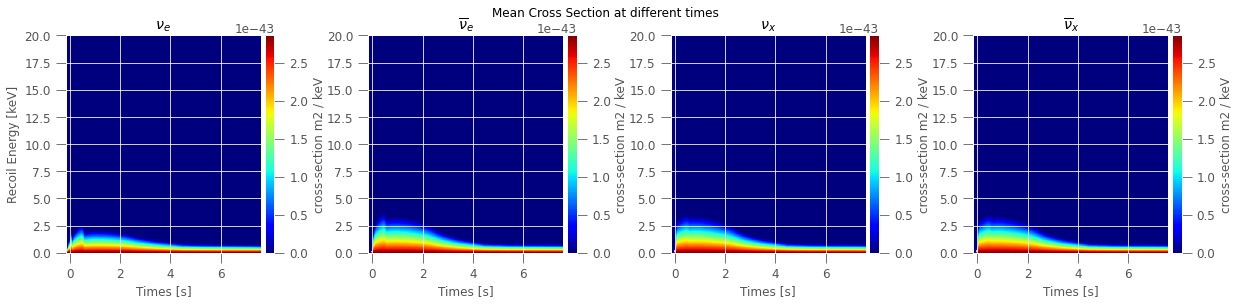

In [28]:
Er_vals = np.linspace(0,20,150)*u.keV
xsec_t = {f:np.zeros((len(Er_vals), len(model.time))) for f in Flavor}

for f in Flavor:
    xsec_t[f] = nN_cross_section(model.meanE[f], Er_vals)
    
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(20,4))
plt.subplots_adjust(wspace=0.45, hspace=0.3)
plt.suptitle("Mean Cross Section at different times", y=0.98)
for j, f in enumerate(Flavor):
    im = axes[j].imshow(xsec_t[f], extent=(np.amin(model.time.value), np.amax(model.time.value),
                                           np.amin(Er_vals.value), np.amax(Er_vals.value),),
                        cmap='jet', aspect='auto', origin='lower')
    divider = make_axes_locatable(axes[j])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical', label=f'cross-section {xsec_t[Flavor.NU_E].unit}')
    axes[j].set_title(f.to_tex())
    axes[j].set_xlabel(f'Times [{model.time.unit}]')
    axes[j].tick_params(axis='both', which='major', labelsize=12)
axes[0].set_ylabel(f'Recoil Energy [{Er_vals.unit}]');

### Part1 flux $\times$ Cross-section

Now that we have fluxes and cross sections, we can compute the first part of the differential rate equation. <br>
Notice, at first we look at recoils at each times ($t$) and with some recoil energies ($E_R$) later we integrate over energies to get the cumulative recoil rates at any times. After that integrating over times gives the total rates after the duration of a supernova.

Now we can calculate the term 
$$ \frac{d^2 R}{dE_R dt_{pb}} = \sum N_{Xe} \underbrace{\int_{E_{min}^\nu} dE_\nu \underbrace{~f_\nu (E_\nu,t) ~\frac{d\sigma}{dE_R}(E_\nu, E_r)}_{part1}}_{part2}$$

**Integrate the fluxes over all times** <br>
For this we compute the fluxes at each time and at sampled neutrino energies. Later, we can integrate over the times, meaning that at any given neutrino energy we will get the total number of flux after the duration of the supernova.
- compute time integrated fluxes
$$ \int_{t0}^{tf} \frac{d^2 R}{dE_R dt_{pb}} = \frac{d R}{dE_R} = 
\sum N_{Xe} \int_{t0}^{tf} dt \int_{E_{min}^\nu} dE_\nu ~f_\nu (E_\nu,t) ~\frac{d\sigma}{dE_R}(E_\nu, E_r) $$

In [29]:
%%time
# integrate the fluxes over all times
sampled_times = model.time #[::50]
_testflux = model.get_initial_spectra(sampled_times[0], Enu_vals[0])[Flavor.NU_E]
_fluxes = np.zeros((len(sampled_times), len(Enu_vals))) * _testflux.unit
_fluxes = {f:_fluxes.copy() for f in Flavor}

for f in tqdm(Flavor, total=4):
    for i, sec in tqdm(enumerate(sampled_times), total=len(sampled_times), desc=f.to_tex(), leave=False):
        _fluxes_dict = model.get_initial_spectra(sec, Enu_vals)
        _fluxes[f][i,:] = _fluxes_dict[f]

  0%|          | 0/4 [00:00<?, ?it/s]

$\nu_e$:   0%|          | 0/12380 [00:00<?, ?it/s]

$\overline{\nu}_e$:   0%|          | 0/12380 [00:00<?, ?it/s]

$\nu_x$:   0%|          | 0/12380 [00:00<?, ?it/s]

$\overline{\nu}_x$:   0%|          | 0/12380 [00:00<?, ?it/s]

CPU times: user 2min 16s, sys: 2.36 s, total: 2min 18s
Wall time: 2min 14s


Now we integrate over the first axis which is time. Since the times are not linearly spaced, we use a trapezoid function which takes this into account.

In [30]:
time_integrated_fluxes = {f:np.trapz(_fluxes[f], sampled_times, axis=0) for f in Flavor}
# time_integrated_fluxes = {f:np.sum(_fluxes[f], axis=0)*u.s for f in Flavor}
_fluxes[Flavor.NU_E].shape, time_integrated_fluxes[Flavor.NU_E].shape

((12380, 100), (100,))

One can see that initially we had `((248, 100))` meaning at each 248 time step we had a flux value for each 100 neutrino energy. <br>
Afterwards, we integrated over the energies and ended up with `(100,)` fluxes, one flux value at each neutrino energy containing the total sum flux over all times. <br>

Since we sampled only some neutrino energies, we can interpolate the values in between to get a continues flux value at each neutrino energy.


(-7.5, 80.0)

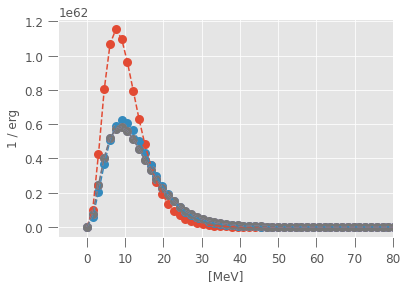

In [31]:
enusamples = np.linspace(0, 100, 600) # more data points
for f in Flavor:
    plt.scatter(Enu_vals, time_integrated_fluxes[f], lw=3);
    flux_t = np.interp(enusamples, Enu_vals.value, time_integrated_fluxes[f])
    plt.plot(enusamples, flux_t, ls='--');
plt.xlabel("[MeV]")
plt.ylabel(time_integrated_fluxes[f].unit);
plt.xlim(None, 80)

We still need to integrate over all the neutrino energies to find the total flux *after all times*, and *for all neutrino energies* for any given *recoil energy*. <br>

$$\frac{d R}{dE_R} = 
\sum N_{Xe} \int_{E_{min}^\nu} dE_\nu ~f_\nu (E_\nu) ~\frac{d\sigma}{dE_R}(E_\nu, E_r) $$


Now we need to integrate over neutrino energies, and use `scipy.integrate.quad` which does not work with units. Therefore, we have to make sure that everything has consistent values.

In [32]:
# time_integfluxes_MeV = time_integrated_fluxes.to(1/u.MeV)
time_integfluxes_MeV = {f:time_integrated_fluxes[f].to(1/u.MeV) for f in Flavor}
def dRdEr_integrand(Enu, Er, f=Flavor.NU_E):
    """ integration passes both in MeV
    """
    # first get the cross-section
    xsec = nN_cross_section(np.array([Enu])*u.MeV, [Er]*u.MeV)[0]
    xsecval = xsec.to(u.m**2 / u.MeV).value # m^2/MeV
    flux_t = np.interp(Enu, Enu_vals.value, time_integfluxes_MeV[f].value)
    return flux_t * xsecval

import scipy.integrate as sintegrate
@np.vectorize
def dRdEr(ErMeV):
    """ Er has to be in MeV
    """
    minE = np.sqrt(0.5*m_Nval.to_value("MeV")*ErMeV)
    y, err = sintegrate.quad(dRdEr_integrand, minE, 100, args=(ErMeV)) 
    return y

In [33]:
N_Xe = 4.6e27*u.count/u.tonne
scale = (4*np.pi*(10*u.kpc)**2).to(u.m**2)

In [34]:
%%time
dRdEr(0.001)

/tmp/ipykernel_1726/1504259209.py:18: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  y, err = sintegrate.quad(dRdEr_integrand, minE, 100, args=(ErMeV))


CPU times: user 7.3 s, sys: 38.3 ms, total: 7.34 s
Wall time: 7.24 s


array(2.0098671e+17)

Alternative, more crude way: Use trapezoid

$$\frac{d R}{dE_R} = 
\sum N_{Xe} \int_{E_{min}^\nu} dE_\nu ~f_\nu (E_\nu) ~\frac{d\sigma}{dE_R}(E_\nu, E_r) $$


`time_integfluxes_MeV` has the fluxes at each sampled neutrino energies. Below, `flux` has an interpolation of this i.e. sampled more neutrino energies and interpolated the fluxes.

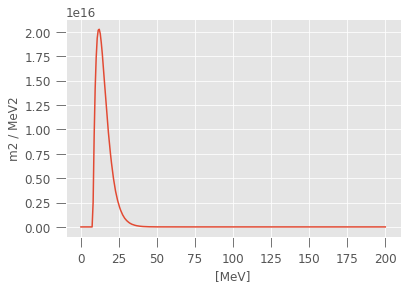

In [35]:
neutrino_energy_sampling = np.linspace(0,200,300)*u.MeV
xsec = nN_cross_section(neutrino_energy_sampling, [0.001]*u.MeV)[0].to(u.m**2 / u.MeV)
flux = np.interp(neutrino_energy_sampling, Enu_vals, time_integfluxes_MeV[Flavor.NU_E])

value = np.trapz((xsec*flux), neutrino_energy_sampling)
plt.plot(neutrino_energy_sampling, xsec*flux);
# plt.text(60,1.25e19, f"{value.value:.2e} [{value.unit}]")
plt.xlabel(f'[{neutrino_energy_sampling.unit}]')
plt.ylabel((xsec*flux).unit);

Plot the neutrino energies vs cross-section$\times$flux values for each recoil energy. The area under the curve is the integral.

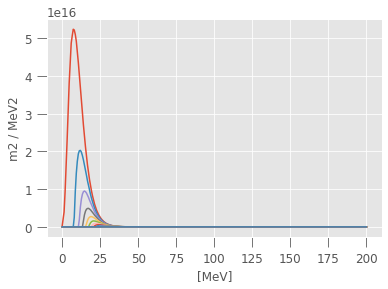

In [36]:
flux = np.interp(neutrino_energy_sampling, Enu_vals, time_integfluxes_MeV[Flavor.NU_E])
trapz = 0
for er in np.linspace(0,15,16):
    xsec = nN_cross_section(neutrino_energy_sampling, [er/1000]*u.MeV)[0].to(u.m**2 / u.MeV)
    plt.plot(neutrino_energy_sampling, xsec*flux);
    trapz += np.trapz((xsec*flux), neutrino_energy_sampling)
# plt.text(60,5e19, f"{trapz:.2e}")
plt.xlabel('[MeV]')
plt.ylabel((xsec*flux).unit);

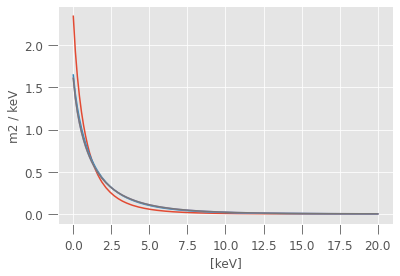

In [37]:
test = {f:np.zeros(len(Er_vals))*(u.m**2/u.keV) for f in Flavor}
flux = {f:np.interp(neutrino_energy_sampling, Enu_vals, time_integfluxes_MeV[f]) for f in Flavor}

for f in Flavor:
    for i, Er in enumerate(Er_vals):
        xsec = nN_cross_section(neutrino_energy_sampling, [Er.value]*Er.unit)[0]
        test[f][i] = np.trapz((xsec*flux[f]), neutrino_energy_sampling).to(u.m**2/u.keV)
    plt.plot(Er_vals, test[f]*N_Xe/scale)
    
plt.xlabel(f'[{Er_vals.unit}]')
plt.ylabel(f"{test[f].unit}");

Compute the total rates $R$ at each $E_R$ value and plot against these recoil energies.

The only issue with the trapezoid rule is that it is not as accurate as the `scipy.integrate.quad` and it does not take into account the lower boundaries. <br>
All in all, the differences between the two methods are small.

/tmp/ipykernel_1726/1504259209.py:18: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  y, err = sintegrate.quad(dRdEr_integrand, minE, 100, args=(ErMeV))


CPU times: user 8min 32s, sys: 4.06 s, total: 8min 36s
Wall time: 8min 26s


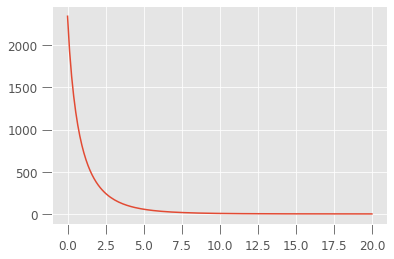

In [38]:
%%time
_a = dRdEr(Er_vals.value*1e-3) # Er values in MeV
plt.plot(Er_vals, _a*N_Xe/scale);
# plt.plot((test[Flavor.NU_E]*N_Xe/scale).value - (_a*N_Xe/scale/1000).value)

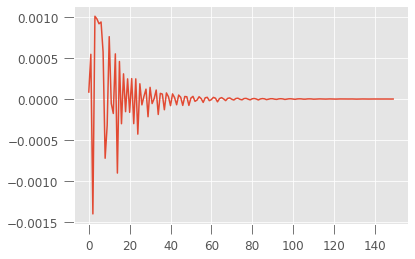

In [39]:
plt.plot((test[Flavor.NU_E]*N_Xe/scale).value - (_a*N_Xe/scale/1000).value)

As one can see, the difference between a crude trapezoid integral and a proper quadratic integral doesn't result in huge differences. Therefore we stick to the trapezoid which is orders of magnitude faster.

---

### Integrate over Recoil Energies to get time distributions

$$ \int_{E_R^{min}}^{E_R^{max}} \frac{d^2 R}{dE_R dt_{pb}} = \frac{d R}{dt_{pb}} = 
\sum N_{Xe} \int_{E_R^{min}}^{E_R^{max}} dE_R \int_{E_{min}^\nu} dE_\nu ~f_\nu (E_\nu,t) ~\frac{d\sigma}{dE_R}(E_\nu, E_r) $$

The `_fluxes` parameter holds the fluxes for all flavors at all times for 100 neutrino energies.

In [40]:
# as an example integrate the neutrino energies at time equal times[0]
# this gives the flux for any given neutrino energy
interpolate_Enu = np.interp(123, Enu_vals.value, _fluxes[Flavor.NU_E][0,:])

Now, let's make a new `_fluxes` parameter which contains more data along the energy axis

In [41]:
neutrino_energy_sampling = np.linspace(0,200,300)*u.MeV
time_fluxes = {f:np.zeros(shape=(len(model.time), len(neutrino_energy_sampling)))*_fluxes[f].unit for f in Flavor}
for i, t in tqdm(enumerate(model.time), total=len(model.time)):
    for f in Flavor:
        time_fluxes[f][i] = np.interp(neutrino_energy_sampling, Enu_vals, _fluxes[f][i,:])

  0%|          | 0/12380 [00:00<?, ?it/s]

In [42]:
xsecs = nN_cross_section(neutrino_energy_sampling, Er_vals).to(u.m**2 / u.MeV)
xsecs.shape, xsecs.unit

((150, 300), Unit("m2 / MeV"))

Notice the cross-sections have a shape `(150,300)`, corresponding to 150 recoil energy values and 300 neutrino energy values. We go ahead and integrate over recoil energies.

$$ \frac{d R}{dt_{pb}} = 
\sum N_{Xe} \int_{E_{min}^\nu} dE_\nu ~f_\nu (E_\nu,t) \int_{E_R^{min}}^{E_R^{max}} dE_R ~\frac{d\sigma}{dE_R}(E_\nu, E_r)  $$

In [43]:
xsecs_integrated = np.trapz(xsecs, Er_vals, axis=0)

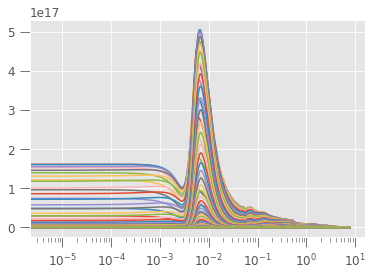

In [44]:
plt.semilogx(model.time, xsecs_integrated*time_fluxes[Flavor.NU_E].to(u.MeV**-1 * u.s**-1));

In [45]:
time_fluxes_integrated = {}
time_fluxes_integrated = {f:np.trapz(time_fluxes[f].to(u.MeV**-1 * u.s**-1)*xsecs_integrated, 
                                     neutrino_energy_sampling, axis=-1).to(u.m**2/u.s) for f in Flavor}

_total = np.zeros_like(time_fluxes_integrated[f])
for f in Flavor:
    _total += time_fluxes_integrated[f]
time_fluxes_integrated["Total"] = _total

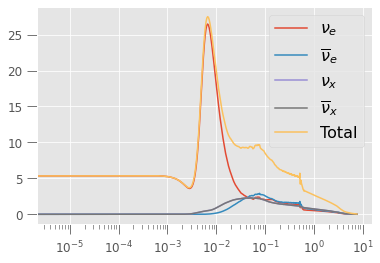

In [46]:
for f in Flavor:
    plt.semilogx(model.time, time_fluxes_integrated[f]*N_Xe/scale, label=f.to_tex());
    
plt.semilogx(model.time, time_fluxes_integrated["Total"]*N_Xe/scale, label="Total");
plt.legend(fontsize=16);

---
### Automate

One needs to define;
- `neutrino_energies` : neutrino energies in MeV with units
- `recoil_energies` : recoil energies in keV with units
- `model` : supernova model

In [48]:
def get_rates(model, 
              neutrino_energies=np.linspace(0,200,300)*u.MeV, 
              recoil_energies=np.linspace(0,20,100)*u.keV, 
              plot=True,
              distance=10*u.kpc):
    N_Xe = 4.6e27*u.count/u.tonne
    scale = (4*np.pi*(distance)**2).to(u.m**2)
    flux_unit = model.get_initial_spectra(1*u.s, 100*u.MeV)[Flavor.NU_E].unit
    _fluxes2 = np.zeros((len(model.time), len(neutrino_energies))) * flux_unit
    _fluxes2 = {f:_fluxes2.copy() for f in Flavor}

    # get fluxes at each time and at each neutrino energy
    for f in tqdm(Flavor, total=len(Flavor)):
        for i, sec in tqdm(enumerate(model.time), total=len(model.time), desc=f.to_tex(), leave=False):
            _fluxes_dict = model.get_initial_spectra(sec, neutrino_energies)
            _fluxes2[f][i,:] = _fluxes_dict[f]

    # get rates per recoil energy after SN duration
    rates_per_Er = {f:np.zeros(len(recoil_energies)) for f in Flavor}
    # integrate over time
    fluxes_per_Er = {f:np.trapz(_fluxes2[f], model.time, axis=0).to(1/u.keV) for f in Flavor} 
    # get cross sections
    xsecs = nN_cross_section(neutrino_energies, recoil_energies)
    
    integ = {f:(xsecs*fluxes_per_Er[f]) for f in Flavor}
    rates_per_Er = {f:np.trapz(integ[f], neutrino_energies, axis=1).to(u.m**2/u.keV) for f in Flavor}

    # get rates per time, from all neutrino energies
    # integrate over recoil energies
    xsecs_integrated = np.trapz(xsecs, recoil_energies, axis=0) 
    flux_x_xsec = {f:_fluxes2[f]*xsecs_integrated for f in Flavor}
    # integrate over nu energies
    rates_per_t = {f:np.trapz(flux_x_xsec[f], neutrino_energies, axis=1).to(u.m**2/u.s) for f in Flavor} 
    total_flux = np.zeros_like(rates_per_t[Flavor.NU_E])

    # add the total fluxes
    for rate in [rates_per_Er, rates_per_t]:
        total_flux = np.zeros_like(rate[Flavor.NU_E])
        for f in Flavor:
            if not f.is_electron:
                _rate = rate[f]*2 # x-neutrinos are for muan and tau
            else:
                _rate = rate[f]
            total_flux += _rate #[f]
        rate["Total"] = total_flux
            
    # add some more info
    rates_per_Er = {**rates_per_Er, **model.metadata}
    rates_per_t = {**rates_per_t, **model.metadata}
    rates_per_Er["distance"] = distance
    rates_per_t["distance"] = distance
    
    # plot if asked
    title_text = (repr(model._repr_markdown_)).split("_repr_markdown_ of")[1].split("\n")[0]
    if plot:
        fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(18,6))
        for f in Flavor:
            ax1.semilogx(model.time, rates_per_t[f]*N_Xe/scale, label=f.to_tex())
            ax2.plot(recoil_energies, rates_per_Er[f]*N_Xe/scale, label=f.to_tex())
        ax1.semilogx(model.time, rates_per_t["Total"]*N_Xe/scale, label="Total")
        ax2.plot(recoil_energies, rates_per_Er["Total"]*N_Xe/scale, label="Total")
        ax1.legend(ncol=2, fontsize=15);  ax2.legend(ncol=5, fontsize=15);
        ax1.set(xlabel=model.time.unit, ylabel=(rates_per_t[f]*N_Xe/scale).unit, title=title_text)
        ax2.set(xlabel=recoil_energies.unit, ylabel=(rates_per_Er[f]*N_Xe/scale).unit, title=title_text)
        ax1.tick_params(axis='both', which='major', labelsize=17)
        ax2.tick_params(axis='both', which='major', labelsize=17)
        ax1.xaxis.label.set_size(17); ax2.xaxis.label.set_size(17)
        ax1.yaxis.label.set_size(17); ax2.yaxis.label.set_size(17)
        xlim = ax2.set_xlim(); ylim = ax2.set_ylim()
        text = "\n".join([f"{k:>15}:{v:<10}" for k,v in model.metadata.items()])
        ax2.text(np.mean(xlim)-np.mean(xlim)/2, np.mean(ylim), text, fontsize=17)
    rates_per_Er["name"] = title_text
    rates_per_t["name"] = title_text
    return rates_per_Er, rates_per_t

  0%|          | 0/4 [00:00<?, ?it/s]

$\nu_e$:   0%|          | 0/12380 [00:00<?, ?it/s]

$\overline{\nu}_e$:   0%|          | 0/12380 [00:00<?, ?it/s]

$\nu_x$:   0%|          | 0/12380 [00:00<?, ?it/s]

$\overline{\nu}_x$:   0%|          | 0/12380 [00:00<?, ?it/s]

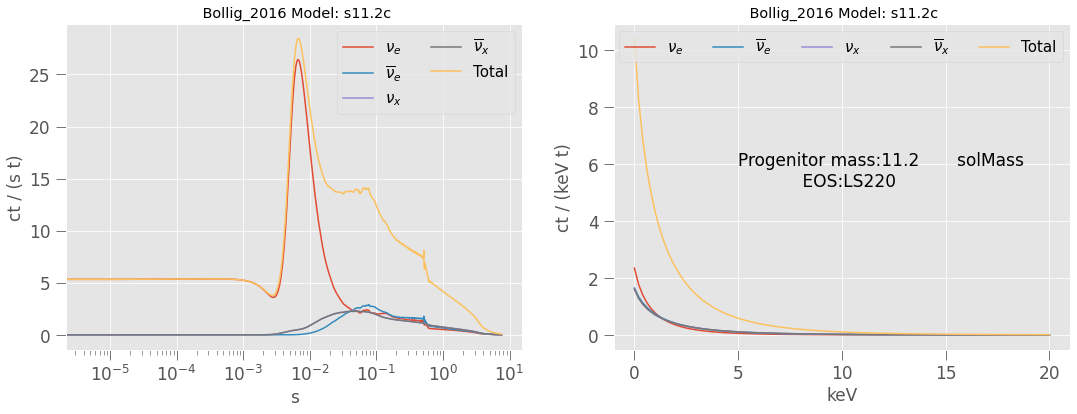

In [49]:
model1_rates = get_rates(model)

  0%|          | 0/4 [00:00<?, ?it/s]

$\nu_e$:   0%|          | 0/391 [00:00<?, ?it/s]

$\overline{\nu}_e$:   0%|          | 0/391 [00:00<?, ?it/s]

$\nu_x$:   0%|          | 0/391 [00:00<?, ?it/s]

$\overline{\nu}_x$:   0%|          | 0/391 [00:00<?, ?it/s]

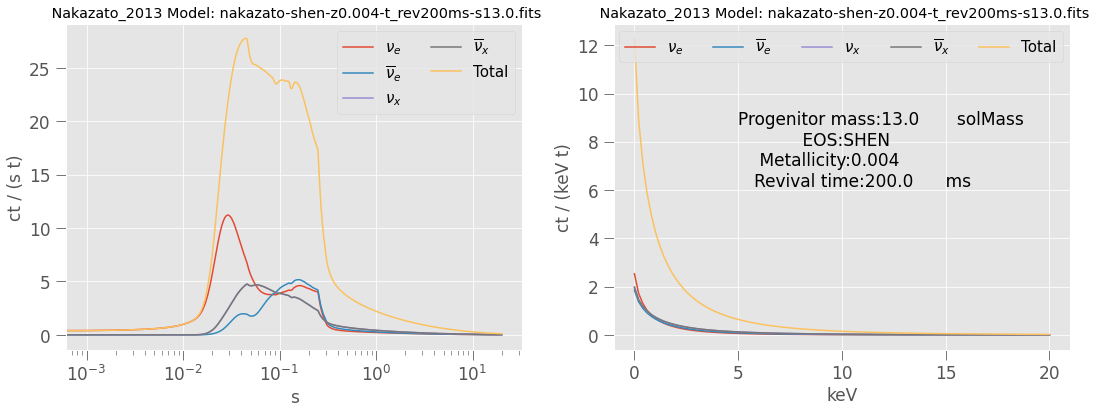

In [53]:
model2_rates = get_rates(model2)

  0%|          | 0/4 [00:00<?, ?it/s]

$\nu_e$:   0%|          | 0/4950 [00:00<?, ?it/s]

$\overline{\nu}_e$:   0%|          | 0/4950 [00:00<?, ?it/s]

$\nu_x$:   0%|          | 0/4950 [00:00<?, ?it/s]

$\overline{\nu}_x$:   0%|          | 0/4950 [00:00<?, ?it/s]

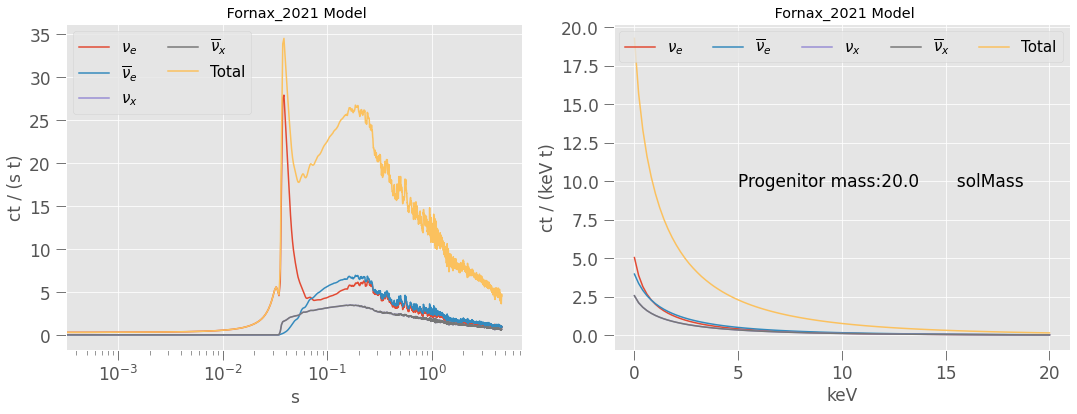

In [54]:
from snewpy.models.ccsn import Fornax_2021
ifile3 = os.path.join(models_folder, 'Fornax_2021/lum_spec_20M_r10000_dat.h5')
model3 = Fornax_2021(ifile3)
model3_rates = get_rates(model3)

In [52]:
# t = 0 
# for f in Flavor:
#     t += model3.luminosity[f].to(u.keV/u.s)
#     plt.semilogx(model3.time, model3.luminosity[f].to(u.keV/u.s))
# plt.semilogx(model3.time, t)

As expected the time distribution is the same as the luminosity distribution. It however, gives us the exact expected rates at given times.

### Compare models

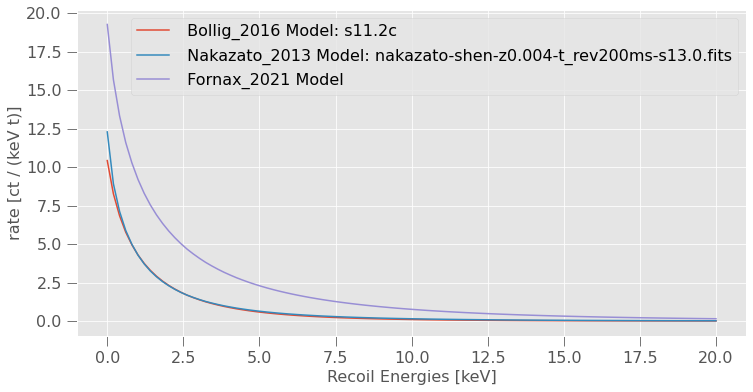

In [55]:
plt.figure(figsize=(12,6))
for m in [model1_rates, model2_rates, model3_rates]:
    plt.plot(np.linspace(0,20,100)*u.keV, m[0]["Total"]*N_Xe/scale, label=m[0]['name']);
plt.xlabel("Recoil Energies [keV]", fontsize=16)
plt.ylabel(f"rate [{(m[0]['Total']*N_Xe/scale).unit}]", fontsize=16)
plt.xticks(fontsize=16); plt.yticks(fontsize=16)
plt.legend(fontsize=16);

  0%|          | 0/4 [00:00<?, ?it/s]

$\nu_e$:   0%|          | 0/391 [00:00<?, ?it/s]

$\overline{\nu}_e$:   0%|          | 0/391 [00:00<?, ?it/s]

$\nu_x$:   0%|          | 0/391 [00:00<?, ?it/s]

$\overline{\nu}_x$:   0%|          | 0/391 [00:00<?, ?it/s]

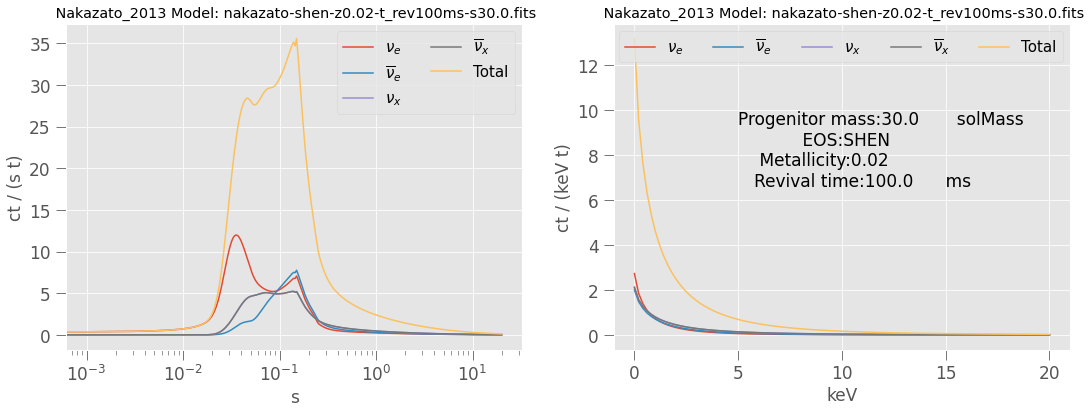

In [56]:
ifile4 = os.path.join(models_folder, "Nakazato_2013/nakazato-shen-z0.02-t_rev100ms-s30.0.fits")
model4 = Nakazato_2013(ifile4)
model4_rates = get_rates(model4)

**A black hole**

  0%|          | 0/4 [00:00<?, ?it/s]

$\nu_e$:   0%|          | 0/4644 [00:00<?, ?it/s]

$\overline{\nu}_e$:   0%|          | 0/4644 [00:00<?, ?it/s]

$\nu_x$:   0%|          | 0/4644 [00:00<?, ?it/s]

$\overline{\nu}_x$:   0%|          | 0/4644 [00:00<?, ?it/s]

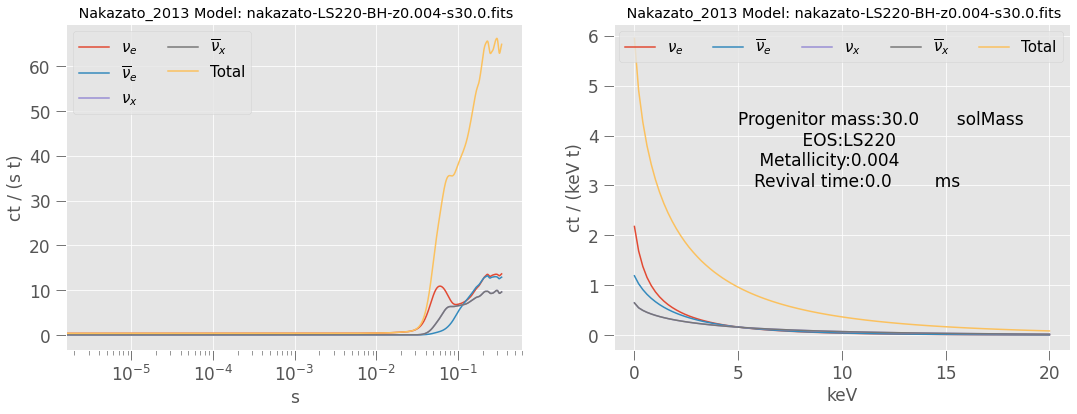

In [57]:
ifile5 = os.path.join(models_folder, "Nakazato_2013/nakazato-LS220-BH-z0.004-s30.0.fits")
model5 = Nakazato_2013(ifile5)
model5_rates = get_rates(model5)

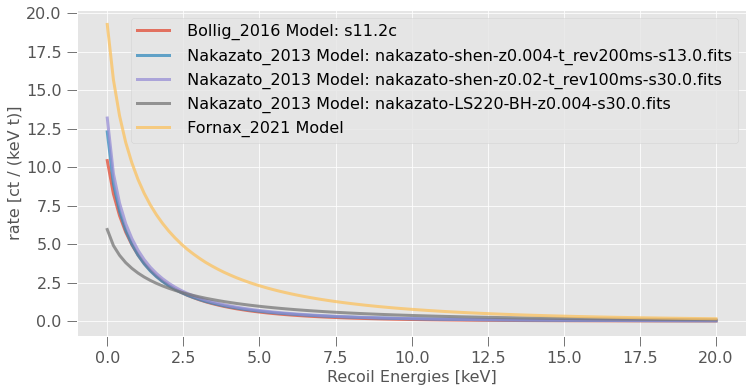

In [58]:
plt.figure(figsize=(12,6))
for m in [model1_rates, model2_rates, model4_rates, model5_rates, model3_rates]:
    plt.plot(np.linspace(0,20,100)*u.keV, m[0]["Total"]*N_Xe/scale, label=m[0]['name'], lw=3, alpha=0.75);
plt.xlabel("Recoil Energies [keV]", fontsize=16)
plt.ylabel(f"rate [{(m[0]['Total']*N_Xe/scale).unit}]", fontsize=16)
plt.xticks(fontsize=16); plt.yticks(fontsize=16)
plt.legend(fontsize=16);

  0%|          | 0/4 [00:00<?, ?it/s]

$\nu_e$:   0%|          | 0/391 [00:00<?, ?it/s]

$\overline{\nu}_e$:   0%|          | 0/391 [00:00<?, ?it/s]

$\nu_x$:   0%|          | 0/391 [00:00<?, ?it/s]

$\overline{\nu}_x$:   0%|          | 0/391 [00:00<?, ?it/s]

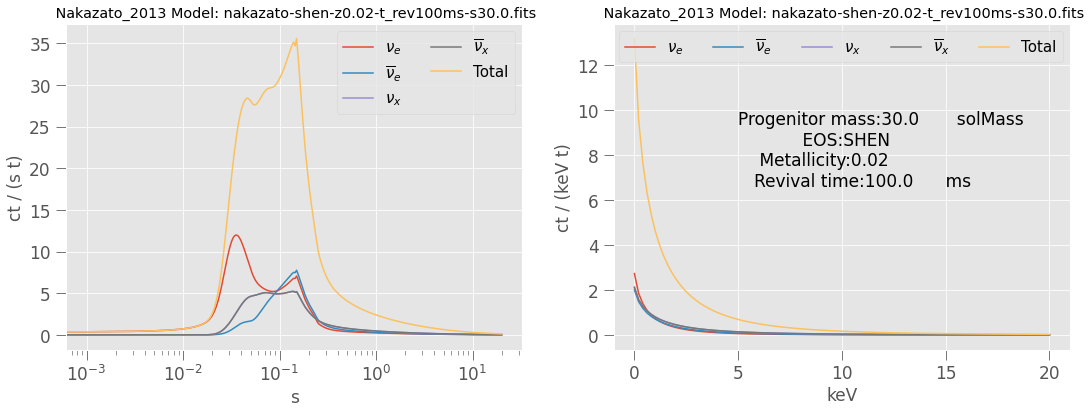

In [59]:
ifile6 = os.path.join(models_folder, "Nakazato_2013/nakazato-shen-z0.02-t_rev100ms-s30.0.fits")
model6 = Nakazato_2013(ifile6)
model6_rates = get_rates(model6)

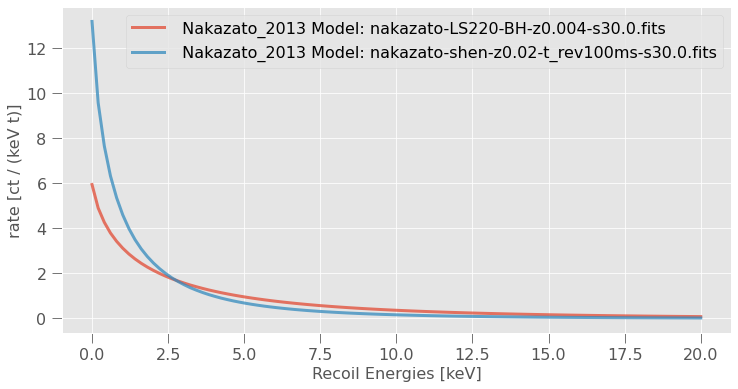

In [60]:
plt.figure(figsize=(12,6))
for m in [model5_rates, model6_rates,]:
    plt.plot(np.linspace(0,20,100)*u.keV, m[0]["Total"]*N_Xe/scale, label=m[0]['name'], lw=3, alpha=0.75);
plt.xlabel("Recoil Energies [keV]", fontsize=16)
plt.ylabel(f"rate [{(m[0]['Total']*N_Xe/scale).unit}]", fontsize=16)
plt.xticks(fontsize=16); plt.yticks(fontsize=16)
plt.legend(fontsize=16);

In [61]:
ifile7 = os.path.join(models_folder, "Bollig_2016/s11.2c")
model7 = Bollig_2016(ifile7, "LS220")
model7_rates = get_rates(model7, plot=False)

ifile8 = os.path.join(models_folder, "Bollig_2016/s27.0c")
model8 = Bollig_2016(ifile8, "LS220")
model8_rates = get_rates(model8, plot=False)

  0%|          | 0/4 [00:00<?, ?it/s]

$\nu_e$:   0%|          | 0/12380 [00:00<?, ?it/s]

$\overline{\nu}_e$:   0%|          | 0/12380 [00:00<?, ?it/s]

$\nu_x$:   0%|          | 0/12380 [00:00<?, ?it/s]

$\overline{\nu}_x$:   0%|          | 0/12380 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

$\nu_e$:   0%|          | 0/9850 [00:00<?, ?it/s]

$\overline{\nu}_e$:   0%|          | 0/9850 [00:00<?, ?it/s]

$\nu_x$:   0%|          | 0/9850 [00:00<?, ?it/s]

$\overline{\nu}_x$:   0%|          | 0/9850 [00:00<?, ?it/s]

(0.0, 10.0)

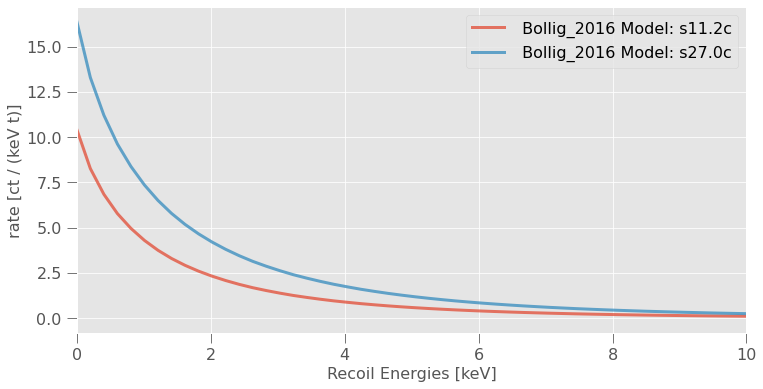

In [62]:
plt.figure(figsize=(12,6))
for m in [model7_rates, model8_rates,]:
    plt.plot(np.linspace(0,20,100)*u.keV, m[0]["Total"]*N_Xe/scale, label=m[0]['name'], lw=3, alpha=0.75);
plt.xlabel("Recoil Energies [keV]", fontsize=16)
plt.ylabel(f"rate [{(m[0]['Total']*N_Xe/scale).unit}]", fontsize=16)
plt.xticks(fontsize=16); plt.yticks(fontsize=16)
plt.legend(fontsize=16);
plt.xlim(0, 10)